# Rzut w polu ziemskim, z oporem powietrza
### Proste równania różniczkowe numerycznie metodą Eulera

Tradycyjnie potrzebne biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

### Inicjalizacja, flaki Eulera

1. Ustawiam zmienne - początkowe położenie w (0,0), początkową prędkość na sztywno na (50, 50) (w domyśle SI: m/s)
2. Ustawiam stałe: przyśpieszenie ziemskie g oraz stałą oporu powietrza
3. Tworzę funkcję `a` która liczy przyśpieszenie z oporem powietrza
4. Tworzę tablicę `T` 1000 punktów czasowych i od razu krok czsowy `dt`
5. Tworzę tablicę `r_history`, która trzyma historię ruchu cząstki
6. W `for`ze rozpisuję metodę Eulera:
    1. Liczę zmianę położenia przyjmując prędkość jako stałą na małym odcinku - mnożę przez krok czasowy
    2. Liczę przyspieszenie (funkcją) i obliczam zmianę położenia (podobnie, mnożąc przez krok czasowy)
    3. Obliczywszy te dwie zmiany mnożę przez krok czasowy


In [4]:
r = np.zeros(2)
v = np.array([50,50])
g = 9.81
opor = 0.1
m = 1                  # na zajęciach zapomnieliśmy o masie, więc żeby się zgadzało dodaję tutaj

def a(r, v):
    return np.array([0, -g]) - opor * v / m #tutaj weszła masa o której zapomnieliśmy

NT = 1000
T, dt = np.linspace(0, 6, NT, retstep=True)

r_history = np.zeros((NT, 2))

for i in range(NT):
    dr = v * dt
    dv = a(r, v) * dt
    
    r_history[i] = r
    
    r = r + dr
    v = v + dv

### Fitowanie krzywej

Wartości parametrów: a: -0.003448, b: 1.162371, c: -3.474886
Odchylenia standardowe: a: 0.000000, b: 0.000007, c: 0.019234


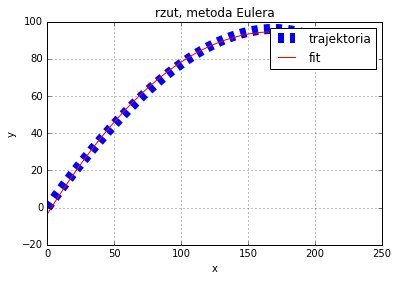

In [8]:
def parabola(x, a, b, c):
    """
    funkcja kwadratowa, żeby curve_fit wiedział co ma dopasowywać
    x: położenie
    a, b, c: parametry paraboli
    """
    return a*x**2 + b*x + c

x = r_history[:,0] #rozbijam macierz r_history na dwie jednowymiarowe
y = r_history[:,1] #tablice położeń na obu osiach

parametry, bledy = curve_fit(parabola, x, y)
a, b, c = parametry


print("Wartości parametrów: a: {:3f}, b: {:3f}, c: {:3f}".format(a,b,c))
print("Odchylenia standardowe: a: {:3f}, b: {:3f}, c: {:3f}".format(*np.sqrt(np.diag(bledy)**2)))

x_fit = np.linspace(0, x.max(), 1000)  #iksy do fitu: na tym samym przedziale co te z Eulera
y_fit = parabola(x_fit, a, b, c)       #dopasowana parabola


plt.title("rzut, metoda Eulera")
plt.plot(x,y, "b--", linewidth=10, label="trajektoria")
plt.plot(x_fit, y_fit, "r-", label = "fit")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()